Links: https://github.com/ddz16/TSFpaper, KAN4TSF => https://github.com/2448845600/EasyTSF

# Model

Write about the used models

# Further Work

Possible future extensions...

# Conclusion

Conclude the results...

**Requirements:**
- The report should be roughly in the style of a blog post, including introduction, motivation, what you tried, what worked and didn’t work, etc. 
- Make sure you evaluate both the good and bad points of your approach.
- Show results of at least one experiment evaluating some aspect of or your entire approach, preferably showing error bars or some sort of statistical measure of the significance. Even if you didn't accomplish your goal, evaluate what you did do.
- A single well-analyzed experiment in a simple domain that compares clearly against a baseline is preferable to a shallow set of experiments across many domains.
- If any parameters are mentioned in the report, be sure to mention how you arrived at their values. Was it the first thing you tried? Trial and error? Roughly how many trials? etc.

# Abstract

# Introduction
The majority of deep learning architectures today are built using multi-layer perceptrons (MLP), which at its core, just consists of linear layers performing matrix multiplication. Even recent advances like Multi-head Attention are still just an extension of this. However, 6 months ago, a new type of neural network, dubbed Korov-Arnold Networks (KANs), started trending on Twitter because it promised to be a radically different approach to building neural networks, with the potential for greater expressivity and efficiency.

Akin to the Universal Approximation Theorem that underlies all MLPs [link to youtube video and wiki], the Kolmogorov–Arnold representation theorem similarly states that any function can be represented as a superposition of continuous single-variable functions. This is significant because it suggests that KANs, which are based on this theorem, may be capable of representing a wider range of functions than traditional MLPs. Furthermore, the theorem implies that this representation can be achieved using a relatively simple structure, potentially leading to more compact and efficient models.

<div style="text-align: center;">
  <img src="KANs.png" alt="KANs" width="600">
</div>

In traditional MLPs, the nodes perform the heavy lifting, combining inputs with learned weights and applying a nonlinear activation function to produce the output. The edges merely serve as conduits for passing information between nodes. In contrast, KANs flip this paradigm on its head. The edges take center stage, applying complex functions to the inputs before passing the results to the next node. The nodes themselves perform a simpler role, simply summing their inputs without any learned weights.

# Motivation

This shift in computational focus has several potential advantages. By allowing the edges to perform complex transformations, KANs may be able to capture more intricate relationships between inputs and outputs. The learnable activation functions on the edges enable KANs to adapt better to complex data patterns compared to MLPs with fixed activation functions. Additionally, because the nodes in KANs do not require learned parameters, the total number of parameters in the network may be vastly reduced, leading to more efficient models that ideally are less prone to overfitting. Furthermore, due to their structure, KANs can be more interpretable than MLPs, which can be beneficial in applications where understanding the model's decision-making process is important.

Unfortunately, KANs also have some drawbacks. One major disadvantage is that KANs are considerably slower to train compared to MLPs, which have benefited from years of optimization and hardware acceleration. This increased computational cost can limit the scalability of KANs to larger and more complex tasks. Additionally, some research indicates [needs citation] that KANs may struggle to perform as well as MLPs on highly complex datasets, potentially limiting their applicability in certain scenarios.

However, KANs are still a relatively new and largely unexplored architecture. The experiments performed in the original KAN paper were limited to small-scale toy problems and boring classification tasks. Despite these limitations, the unique properties of KANs make them an intriguing candidate for time series analysis. Time series data often exhibits complex temporal dependencies and non-linear relationships that can be challenging for traditional MLPs to capture effectively. The learnable activation functions on the edges of KANs allow them to adapt to these intricate patterns more easily, potentially leading to improved performance in time series forecasting and anomaly detection tasks.

Although some preliminary research has been done on their effectiveness in time series analysis [1, https://arxiv.org/pdf/2405.08790] [2, https://arxiv.org/html/2408.11306v1], it remains inconclusive whether they are a promising candidate yet. 

# Experimentation

#### First working run:

```zsh
$ ./scripts/script.sh
Running experiment for seq_len=336, pred_len=18, seed=421 and feature=S (./results/MRO_336_18_S_channels_6_seed_421/logs/KAN.log):

Dataset: MRO.csv (1.6MB)
Train: 12226 time steps, ~50.0 years, start date 1962-01-02, end date 2011-12-16
Vali:  1556 time steps, ~6.3 years , start date 2011-12-19, end date 2018-03-21
Test:  1555 time steps, ~6.2 years , start date 2018-03-22, end date 2024-06-20

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.32353         MAE: 0.46235         SE: 0.39301          RRMSE: 25.71%        RMAE: 20.90%     (numpy)
Repeat               MSE: 0.07527         MAE: 0.18941         SE: 0.14305          RRMSE: 12.40%        RMAE: 8.56%      (numpy)
```

#### Second runs (longer `pred_len` and `seq_len`)
```zsh
Desktop/KANs-timeseries $ ./scripts/script.sh
Running experiment for seq_len=336, pred_len=60, seed=421 and feature=S (./results/MRO_336_60_S_channels_6_seed_421/logs/KAN.log):

Dataset: MRO.csv (1.6MB)
Train: 12184 time steps, ~50.0 years, start date 1962-01-02, end date 2011-12-16
Vali:  1514 time steps, ~6.3 years , start date 2011-12-19, end date 2018-03-21
Test:  1513 time steps, ~6.2 years , start date 2018-03-22, end date 2024-06-20

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.41582         MAE: 0.52733         SE: 0.65135          RRMSE: 29.45%        RMAE: 24.08%     (numpy)
Repeat               MSE: 0.22683         MAE: 0.34802         SE: 0.41335          RRMSE: 21.75%        RMAE: 15.90%     (numpy)


Running experiment for seq_len=336, pred_len=60, seed=421 and feature=S (./results/MRO_336_60_S_channels_6_seed_421/logs/DLinear.log):

...

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.28969         MAE: 0.40837         SE: 0.50525          RRMSE: 24.58%        RMAE: 18.65%     (numpy)
Repeat               MSE: 0.22683         MAE: 0.34802         SE: 0.41335          RRMSE: 21.75%        RMAE: 15.90%     (numpy)
```

```zsh
$ ./scripts/script.sh
Running experiment for seq_len=720, pred_len=120, seed=421 and feature=S (./results/MRO_720_120_S_channels_6_seed_421/logs/KAN.log):

Dataset: MRO.csv (1.6MB)
Train: 11740 time steps, ~50.0 years, start date 1962-01-02, end date 2011-12-16
Vali:  1454 time steps, ~6.3 years , start date 2011-12-19, end date 2018-03-21
Test:  1453 time steps, ~6.2 years , start date 2018-03-22, end date 2024-06-20

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.65365         MAE: 0.62645         SE: 1.15453          RRMSE: 37.70%        RMAE: 29.21%     (numpy)
Repeat               MSE: 0.39830         MAE: 0.47502         SE: 0.70808          RRMSE: 29.43%        RMAE: 22.15%     (numpy)

...

Running experiment for seq_len=720, pred_len=120, seed=421 and feature=S (./results/MRO_720_120_S_channels_6_seed_421/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.45854         MAE: 0.52043         SE: 0.70554          RRMSE: 31.58%        RMAE: 24.27%     (numpy)
Repeat               MSE: 0.39830         MAE: 0.47502         SE: 0.70808          RRMSE: 29.43%        RMAE: 22.15%     (numpy)
```

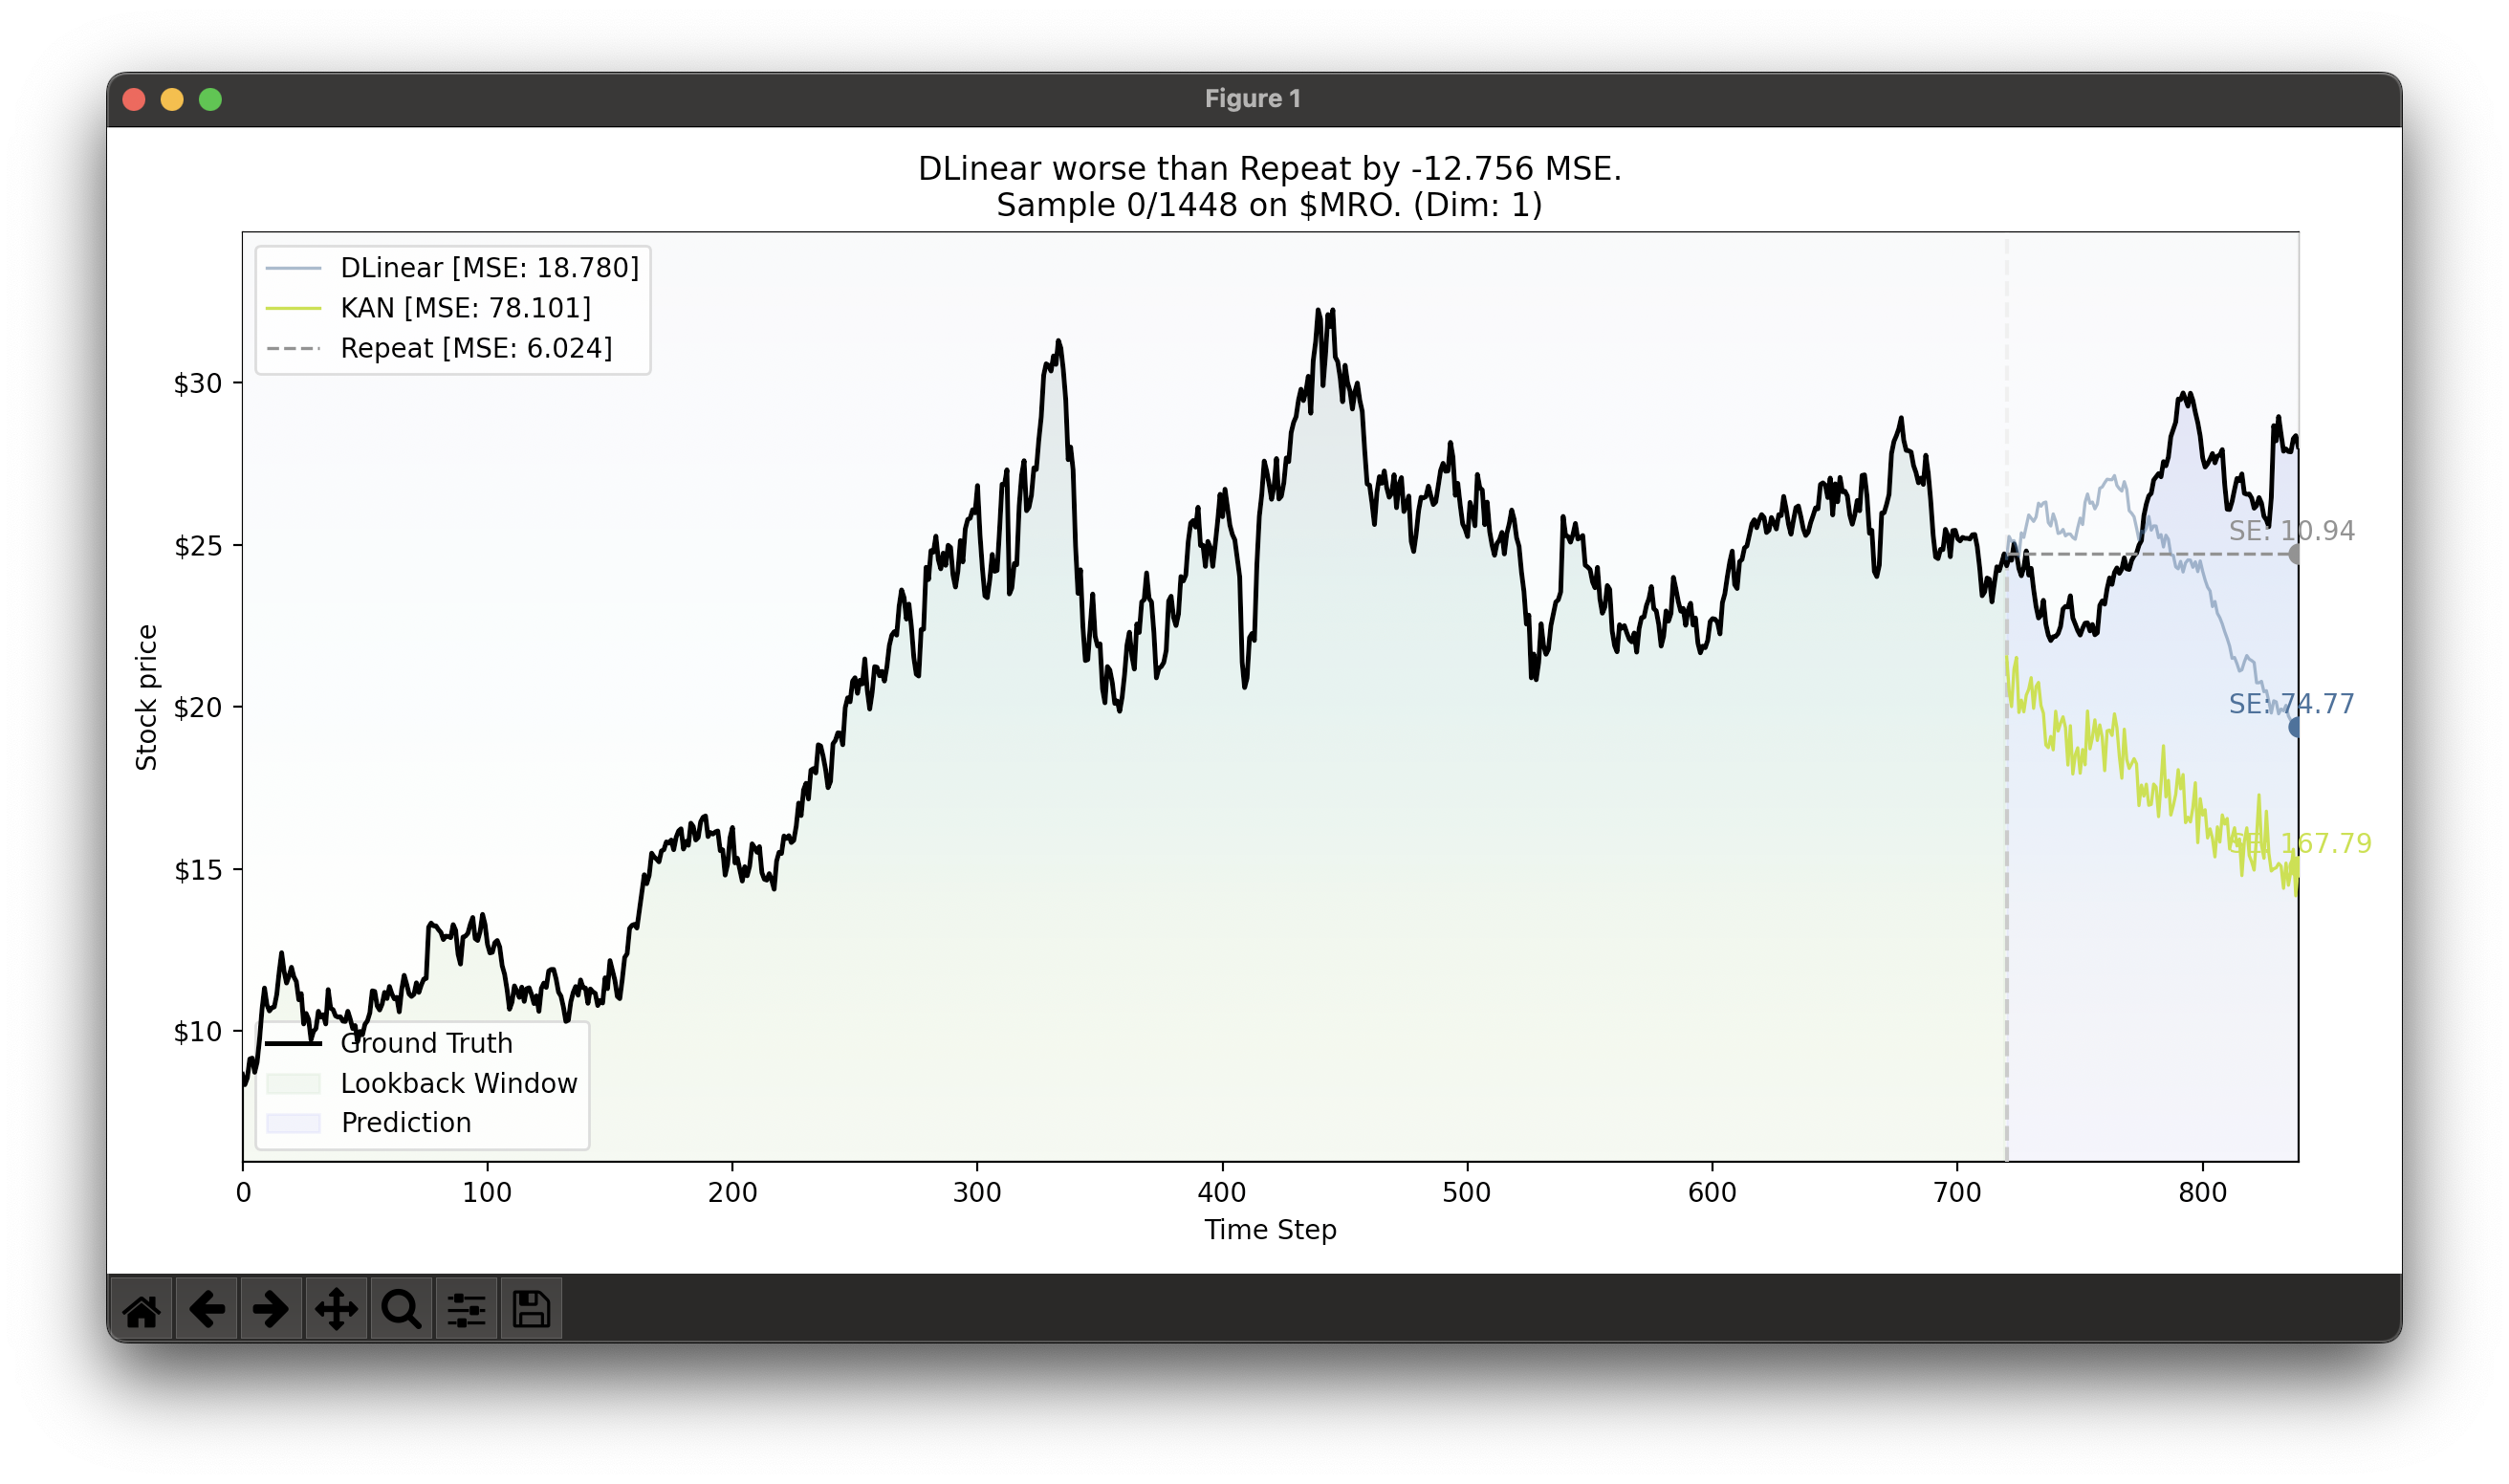

After seeing this result, we wanted to verify that our implementation in KAN.py was actually working as intended given that it performed so much worse than DLinear and seemed to not capture the underlying patterns we had hoped. The original implementation of the pioneering paper (https://github.com/KindXiaoming/pykan), has built-in model interpretation by using model.plot(), however, we used https://github.com/Blealtan/efficient-kan as the training time for the latter is about 10-20x slower. From `efficient-kan`:

> The performance issue of the original implementation is mostly because it needs to expand all intermediate variables to perform the different activation functions. For a layer with in_features input and out_features output, the original implementation needs to expand the input to a tensor with shape (batch_size, out_features, in_features) to perform the activation functions. However, all activation functions are linear combination of a fixed set of basis functions which are B-splines; given that, we can reformulate the computation as activate the input with different basis functions and then combine them linearly. This reformulation can significantly reduce the memory cost and make the computation a straightforward matrix multiplication, and works with both forward and backward pass naturally.

Unfortunately, that led down a hold rabbit-hold of verifying that `pykan` and `efficient-kan` are functionally equivalent.

# Verifying equivalence

We start off in `pykan/pykan_vs_efficient-kan-claude-0.ipynb`:

Where

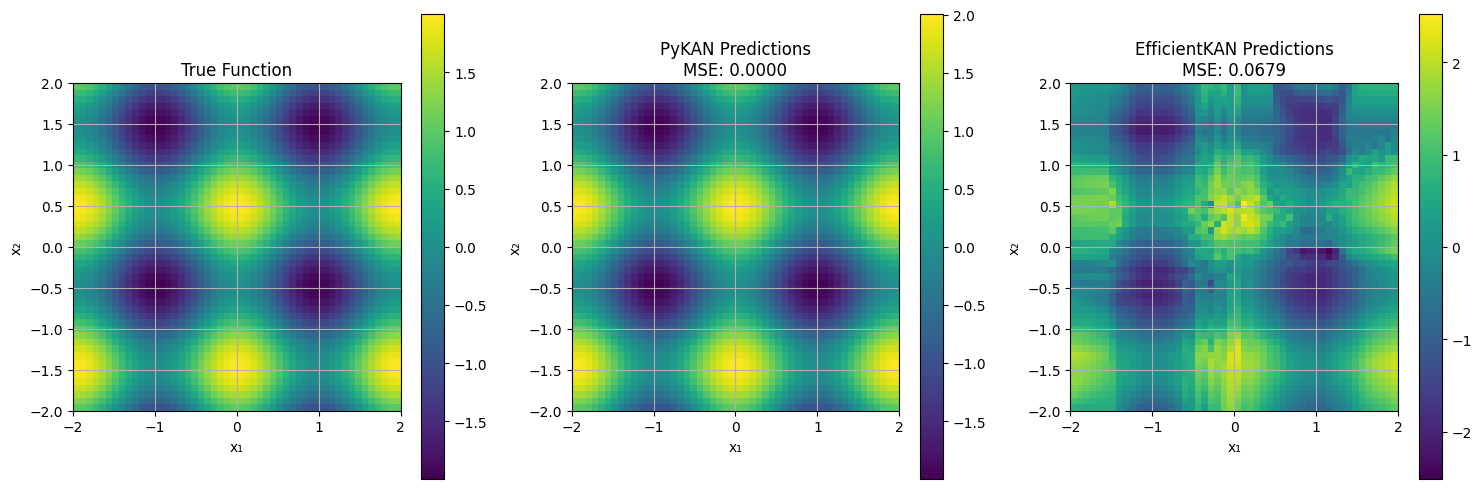

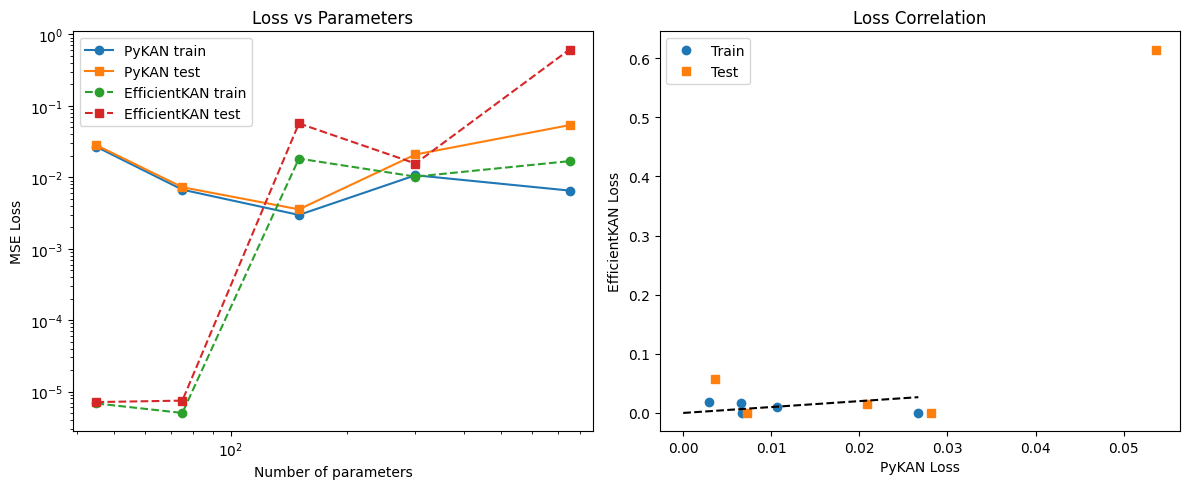

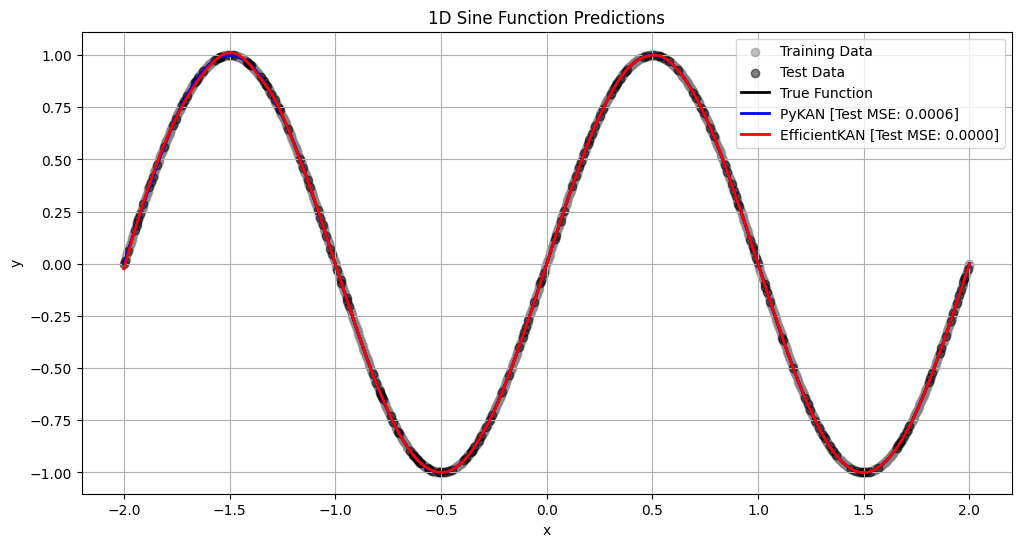

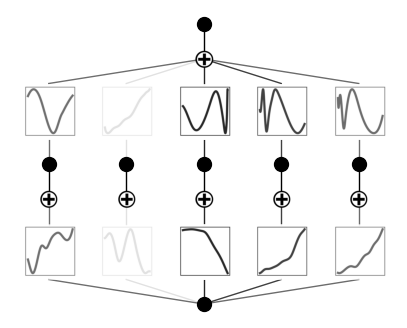

`pykan/efficient-kan_vs_pykan-claude.ipynb`:

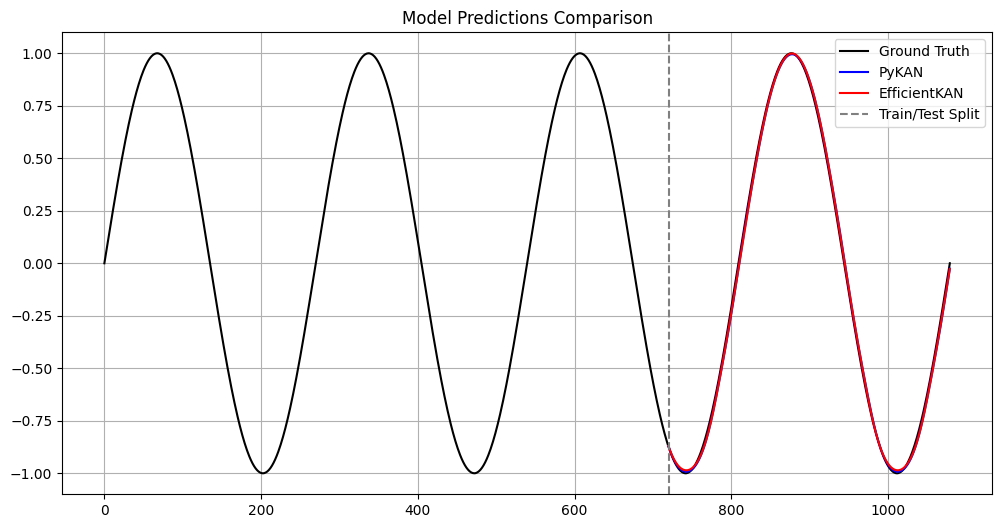

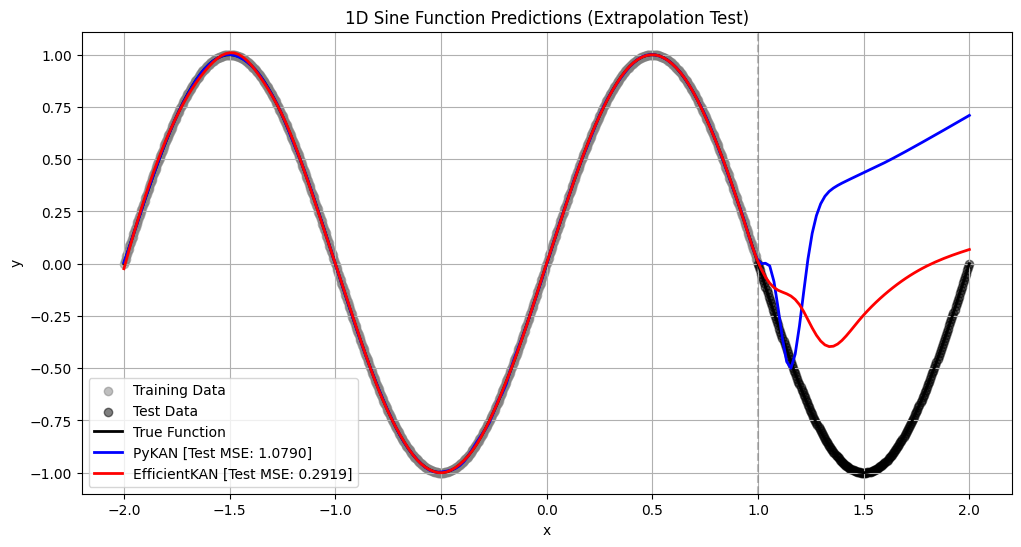

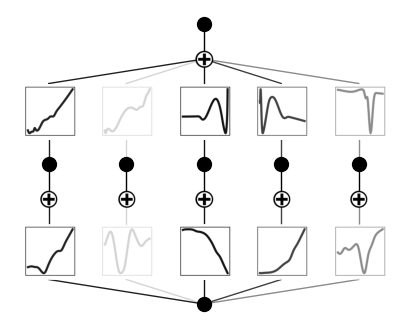

`pykan/efficient-kan_vs_pykan-claude-goat-2.ipynb`:

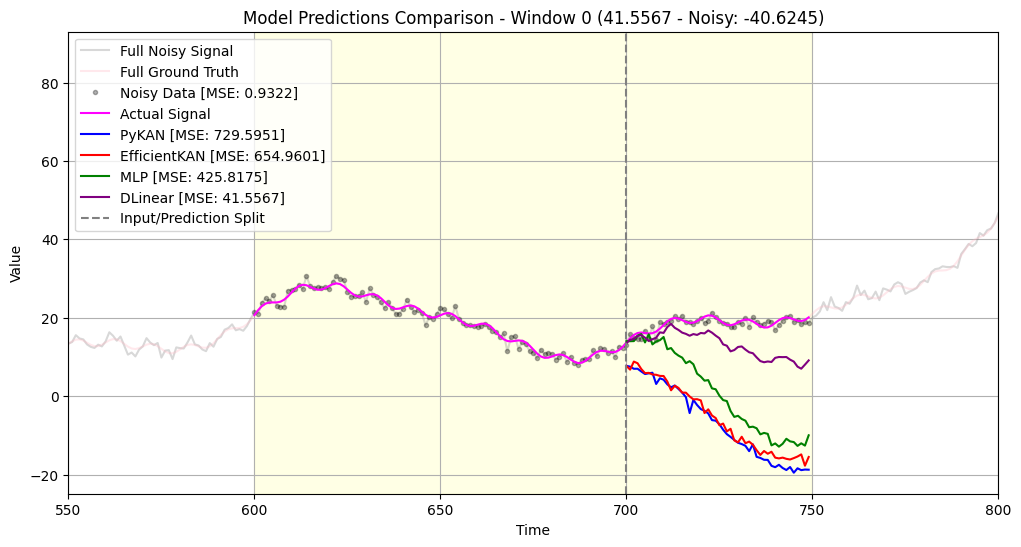

`pykan/efficient-kan_vs_pykan-claude-goat-3.ipynb`:

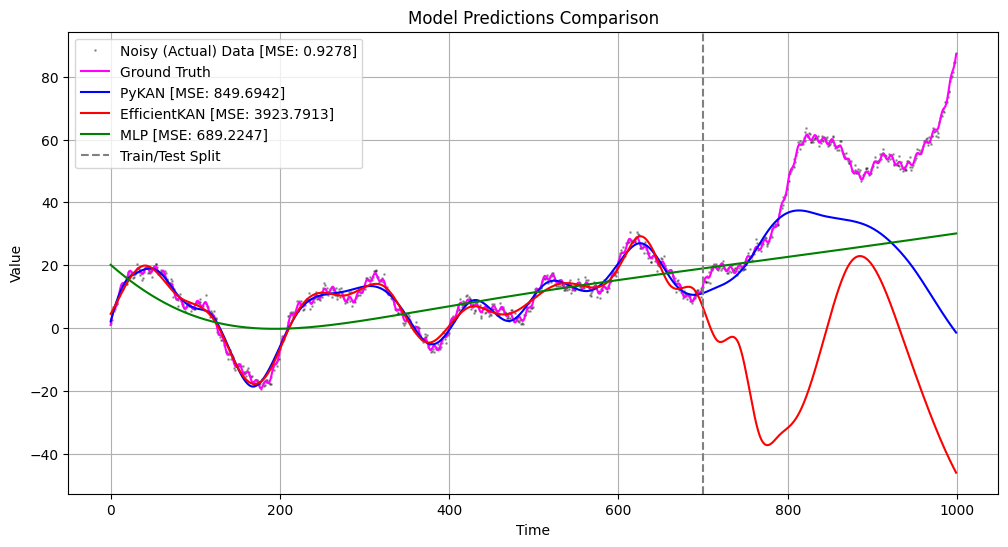

This lead me back to square one, just extrapolating a simple sinus function:

`pykan_vs_efficient-kan-claude-1.ipynb`:

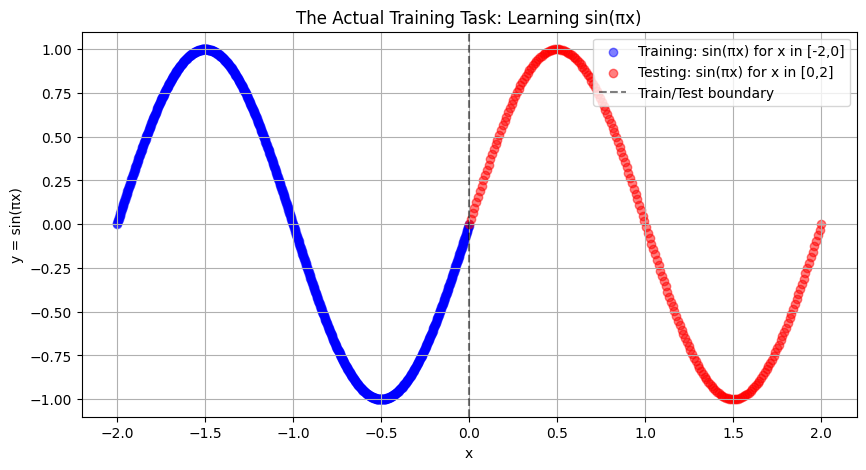

11 minutes.
```zsh
100%|██████████| 2000/2000 [00:02<00:00, 946.25it/s] 

Training with grid size 10
Training PyKAN...
checkpoint directory created: ./model
saving model version 0.0
| train_loss: 4.07e-03 | test_loss: 6.81e-01 | reg: 5.38e+00 | : 100%|█| 2000/2000 [00:47<00:00, 41.
saving model version 0.1
Training EfficientKAN...
100%|██████████| 2000/2000 [00:05<00:00, 356.22it/s]
Training MLP (width=7)...
100%|██████████| 2000/2000 [00:02<00:00, 798.18it/s] 

Training with grid size 20
Training PyKAN...
checkpoint directory created: ./model
saving model version 0.0
| train_loss: 1.91e-02 | test_loss: 7.43e-01 | reg: 8.01e+00 | : 100%|█| 2000/2000 [01:12<00:00, 27.
saving model version 0.1
Training EfficientKAN...
100%|██████████| 2000/2000 [00:07<00:00, 258.54it/s]
Training MLP (width=10)...
100%|██████████| 2000/2000 [00:02<00:00, 948.67it/s] 

Training with grid size 50
Training PyKAN...
checkpoint directory created: ./model
saving model version 0.0
| train_loss: 2.33e-02 | test_loss: 6.73e-01 | reg: 8.05e+00 | : 100%|█| 2000/2000 [01:12<00:00, 27.
saving model version 0.1
Training EfficientKAN...
100%|██████████| 2000/2000 [00:35<00:00, 56.13it/s] 
Training MLP (width=17)...
100%|██████████| 2000/2000 [00:02<00:00, 732.49it/s]

Training with grid size 200
Training PyKAN...
checkpoint directory created: ./model
saving model version 0.0
| train_loss: 7.84e-03 | test_loss: 7.02e-01 | reg: 8.15e+00 | : 100%|█| 2000/2000 [03:04<00:00, 10.
saving model version 0.1
Training EfficientKAN...
100%|██████████| 2000/2000 [01:48<00:00, 18.50it/s] 
Training MLP (width=34)...
100%|██████████| 2000/2000 [00:02<00:00, 724.51it/s]
```

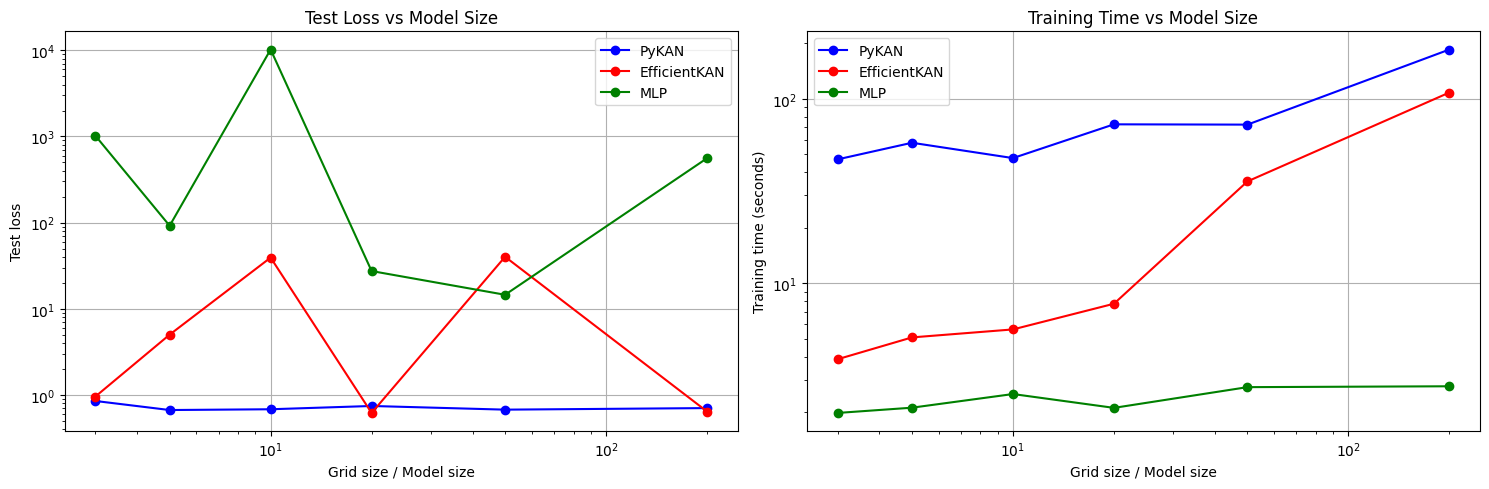

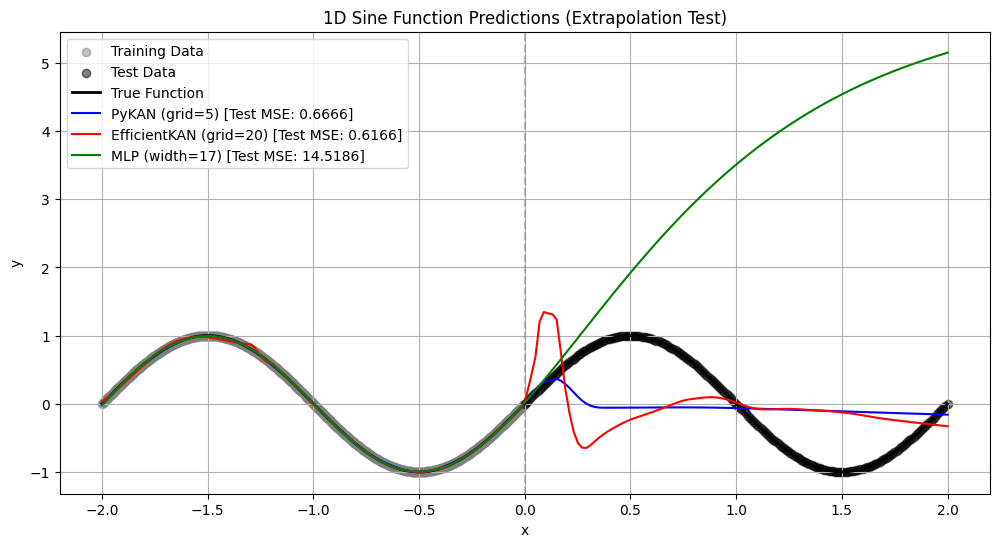

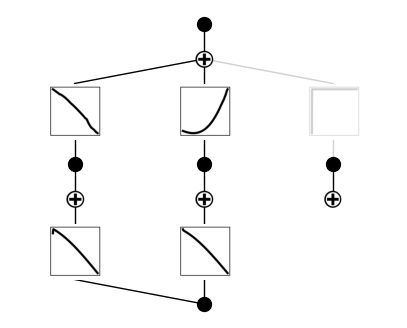

= $\displaystyle 1.0308 \left(\sin{\left(0.5302 x_{1} + 5.2 \right)} + 0.2351\right)^{2} + 0.3168 \cos{\left(0.6466 x_{1} + 3.5714 \right)} - 0.1592$

Given that it sucked and can't even approximate a sin function (but neither can MLP, can DLinear though?), we conclude it's not applicable for forecasting tasks.

# To do:
- Verify KAN.py is actually working as intended, perhaps by model.plot() through a notebook that imports it
- Implement significant difference from repeat; Explain repeat significance (true test to see if a dataset is truly random / predictable or not is if it can beat repeat)

https://youtu.be/cDM3CMtBUFw?si=MSeOmAtGlhyC0mMP&t=3313

The core issue is that splines are inherently local approximators, making them great for interpolation but poor at extrapolating global patterns like periodicity.